<a href="https://colab.research.google.com/github/JacopoMangiavacchi/TF-VS-PyTorch/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import PyTorch and TensorFlow

In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
print(f"tensorflow version: {tf.__version__}")

tensorflow version: 2.3.0


In [3]:
import torch
print(f"pytorch version: {torch.__version__}")

pytorch version: 1.6.0+cu101


# Generating the datasets

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def generate_data(m=0.1, b=0.3, n=200):
    x = np.random.uniform(-10, 10, n)
    noise = np.random.normal(0, 0.15, n)
    y = (m * x + b ) + noise
    return x.astype(np.float32), y.astype(np.float32)

    # x = tf.random.uniform(shape=(n,),minval=-10,maxval=10) 
    # noise = tf.random.normal(shape=(len(x),), stddev=0.15)
    # y = (m * x + b ) + noise
    # return x.numpy(), y.numpy()

## Data Visualization

Text(0, 0.5, 'y')

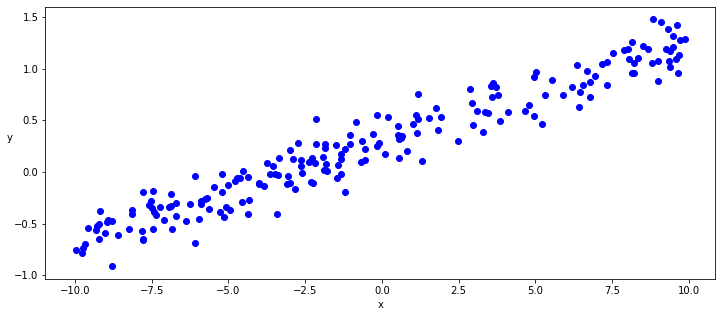

In [6]:
x, y = generate_data()

plt.figure(figsize = (12,5))
ax = plt.subplot(111)
ax.scatter(x,y, c = "b", label="samples")
plt.xlabel("x")
plt.ylabel("y",rotation = 0)

# TensorFlow Model

In [7]:
class LinearRegressionKeras(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.w = tf.Variable(tf.random.uniform(shape=[1], minval=-0.1, maxval=0.1))
        self.b = tf.Variable(tf.random.uniform(shape=[1], minval=-0.1, maxval=0.1))

    def __call__(self,x): 
        y_pred = x * self.w + self.b
        return y_pred

# class LinearRegressionKeras(tf.keras.Model):
#     def __init__(self):
#         super().__init__()
#         self.params = {
#             "w" : tf.Variable(tf.random.uniform(shape=[1], minval=-0.1, maxval=0.1)),
#             "b" : tf.Variable(tf.random.uniform(shape=[1], minval=-0.1, maxval=0.1))
#         }        

#     def __call__(self,x): 
#         y_pred = x * self.params["w"] + self.params["b"]
#         return y_pred

# PyTorch Model

In [8]:
class LinearRegressionPyTorch(torch.nn.Module): 
    def __init__(self): 
        super().__init__() 
        self.w = torch.nn.Parameter(torch.Tensor(1, 1))
        self.b = torch.nn.Parameter(torch.Tensor(1))
        self.w.data.uniform_(-0.1, 0.1)
        self.b.data.uniform_(-0.1, 0.1)
  
    def forward(self, x):  
        return x @ self.w + self.b
    
    
# class LinearRegressionPyTorch(torch.nn.Module):
#     def __init__(self):
#         super(LinearRegressionPyTorch, self).__init__()
#         self.linear = torch.nn.Linear(1, 1)  

#     def forward(self, x):
#         out = self.linear(x)
#         return out

# TensorFlow Training

In [9]:
epochs = 500
learning_rate = 0.001

In [10]:
def squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

tf_model = LinearRegressionKeras()
[w, b] = tf_model.trainable_variables

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        predictions = tf_model(x)
        loss = squared_error(predictions, y)
        
    w_grad, b_grad = tape.gradient(loss, tf_model.trainable_variables)

    w.assign(w - w_grad * learning_rate)
    b.assign(b - b_grad * learning_rate)

    if epoch % 20 == 0:
        print(f"Step {epoch}, Loss {loss.numpy()}") # we print the loss only each 20 epochs

Step 0, Loss 1.2142930030822754
Step 20, Loss 0.15634870529174805
Step 40, Loss 0.09081083536148071
Step 60, Loss 0.08241317421197891
Step 80, Loss 0.07763849198818207
Step 100, Loss 0.07339900732040405
Step 120, Loss 0.06949307769536972
Step 140, Loss 0.06588602811098099
Step 160, Loss 0.0625545084476471
Step 180, Loss 0.05947745218873024
Step 200, Loss 0.05663540959358215
Step 220, Loss 0.054010435938835144
Step 240, Loss 0.05158594995737076
Step 260, Loss 0.04934665188193321
Step 280, Loss 0.047278374433517456
Step 300, Loss 0.045368071645498276
Step 320, Loss 0.043603669852018356
Step 340, Loss 0.041974037885665894
Step 360, Loss 0.040468886494636536
Step 380, Loss 0.03907868266105652
Step 400, Loss 0.03779466450214386
Step 420, Loss 0.03660871088504791
Step 440, Loss 0.035513341426849365
Step 460, Loss 0.034501634538173676
Step 480, Loss 0.033567190170288086


# PyTorch Training

In [11]:
inputs = torch.autograd.Variable(torch.from_numpy(x.reshape(-1, 1)))
labels = torch.autograd.Variable(torch.from_numpy(y.reshape(-1, 1)))


In [12]:
def squared_error(y_pred, y_true):
    diff = y_pred - y_true
    return torch.sum(diff * diff) / diff.numel()


torch_model = LinearRegressionPyTorch()
[w, b] = torch_model.parameters()

# criterion = torch.nn.MSELoss(reduction='mean')
# optimizer = torch.optim.SGD(torch_model.parameters(), lr=learning_rate)

for epoch in range(epochs):
    epoch_loss = 0
    y_pred = torch_model(inputs)

    loss = squared_error(y_pred, labels)

    epoch_loss = loss.data

    # optimizer.zero_grad()
    loss.backward()
    # optimizer.step()

    with torch.no_grad():
        w -= w.grad * learning_rate
        b -= b.grad * learning_rate
        w.grad.zero_()
        b.grad.zero_()

    if epoch % 20 == 0:
      print("Epoch {} : Loss {}".format(epoch, epoch_loss))


Epoch 0 : Loss 0.6021134853363037
Epoch 20 : Loss 0.1154419407248497
Epoch 40 : Loss 0.0830254778265953
Epoch 60 : Loss 0.07693799585103989
Epoch 80 : Loss 0.07267960906028748
Epoch 100 : Loss 0.06882447004318237
Epoch 120 : Loss 0.06526825577020645
Epoch 140 : Loss 0.06198390573263168
Epoch 160 : Loss 0.058950427919626236
Epoch 180 : Loss 0.05614863336086273
Epoch 200 : Loss 0.05356084927916527
Epoch 220 : Loss 0.0511707179248333
Epoch 240 : Loss 0.04896313697099686
Epoch 260 : Loss 0.046924151480197906
Epoch 280 : Loss 0.04504090175032616
Epoch 300 : Loss 0.04330149665474892
Epoch 320 : Loss 0.04169493168592453
Epoch 340 : Loss 0.04021110013127327
Epoch 360 : Loss 0.03884058818221092
Epoch 380 : Loss 0.03757474198937416
Epoch 400 : Loss 0.036405593156814575
Epoch 420 : Loss 0.03532573580741882
Epoch 440 : Loss 0.03432835265994072
Epoch 460 : Loss 0.03340715169906616
Epoch 480 : Loss 0.032556310296058655


# Data Visualization

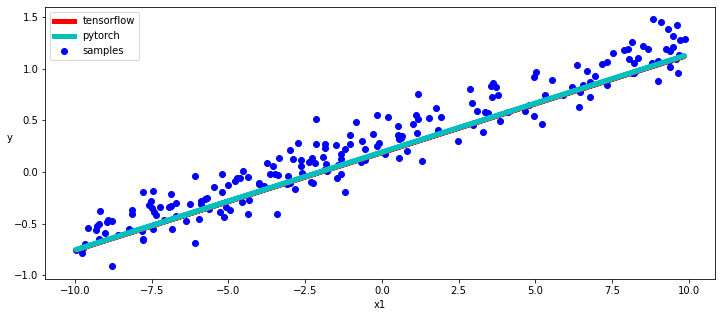

In [13]:
[w_tf, b_tf] = tf_model.trainable_variables
[w_torch, b_torch] = torch_model.parameters()

with torch.no_grad():
  plt.figure(figsize = (12,5))
  ax = plt.subplot(111)
  ax.scatter(x, y, c = "b", label="samples")
  ax.plot(x, w_tf * x + b_tf, "r", linewidth = 5.0, label = "tensorflow")
  ax.plot(x, w_torch * inputs + b_torch, "c", linewidth = 5.0, label = "pytorch")
  ax.legend()
  plt.xlabel("x1")
  plt.ylabel("y",rotation = 0)